In [34]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
from collections import Counter
import scattertext as st
import spacy
from pprint import pprint
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')
from nltk.corpus import stopwords

import csv
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import re

from functools import reduce


import nltk

import itertools
words = set(nltk.corpus.words.words())

import plotly.express as px
import emoji
import spacy
import pyLDAvis

import collections

Loading BokehJS ...

In [2]:
df = pd.read_csv("C:/Users/Swazy/agriculture-ie-clean.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2222 non-null   int64  
 1   id               2222 non-null   int64  
 2   created_at       2222 non-null   object 
 3   favorite_count   2222 non-null   int64  
 4   retweet_count    2222 non-null   int64  
 5   text             2222 non-null   object 
 6   clean_text       2221 non-null   object 
 7   polarity_tokens  2222 non-null   float64
 8   review_len       2222 non-null   int64  
 9   word_count       2222 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 173.7+ KB


In [4]:
print('Random positive word tokens: \n')
cl = df.loc[df.polarity_tokens >0.5, ['text']].sample(7).values
for c in cl:
    print(c[0])

Random positive word tokens: 

Imports of ware potatoes into Ireland from Great Britain can continue after 1 January once pre-notified and accompanied by a Phytosanitary Certificate.

Note: removal of this ban does not apply to seed potatoes, which are prohibited entry from 1 January into the EU.
Minister @pippa_hackett has described the first meeting of newly formed Forestry Policy Group as 'good and productive'.

📍https://t.co/X97uLlnie7
Minister @martinheydonfg has welcomed #Budget2022, and its significant allocation to the area of farm safety. For the first time, the Department of will have a dedicated budget for #farmsafety of €2 million.

https://t.co/CUYsjSdbmZ https://t.co/GDbw1ssKva
We look forward to welcoming keynote speaker Dr Martin Frick to Ireland’s first national dialogue on @UN’s @FoodSystems on Sustainable Food Systems and Ireland’s 2030 Agri-Food Strategy 

#FoodSystems #unfss2021 

🗓Tune in Wednesday, April 21 
➡️Sign up: https://t.co/VbCWIupjMf https://t.co/EfwUCqd

In [5]:
df['polarity_tokens'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity_tokens',
    linecolor='black',
    yTitle='count',
    title='Token Polarity Distribution')

C:\Users\Swazy\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Swazy\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [6]:
df['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

C:\Users\Swazy\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Swazy\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [7]:
df['clean_text']= df['clean_text'].values.astype('U')

In [42]:
df3.to_csv('df3.csv', index = False)

In [41]:
# function to prepare n-grams
def count_ngrams(lines, min_length=2, max_length=4):
    lengths = range(min_length, max_length+1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen = max_length)
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current)>= length:
                ngrams[length][current[:length]] +=1
    for line in lines:
        for word in nltk.word_tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()
    while len(queue) > min_length:
        queue.popleft()
        add_queue()
    return ngrams

In [42]:
def print_most_freq_ng(ngrams, num=2222):
    for n in sorted(ngrams):
        print('----{} most frequent {}-grams ----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
        print('')

In [43]:
print_most_freq_ng(count_ngrams((df['clean_text'])))

----2222 most frequent 2-grams ----
minister say: 277
agri food: 120
public consultation: 96
brexit webinar: 56
food system: 55
minister announce: 50
closing date: 48
plant health: 48
wild bird: 46
leave apply: 46
cap tour: 43
climate action: 41
irish farmer: 40
today minister: 40
national dialogue: 40
animal health: 39
week leave: 39
strategic plan: 38
international year: 38
awareness week: 37
food strategy: 37
tune friday: 36
gas emission: 34
great britain: 34
cap strategic: 33
day leave: 33
minister today: 32
irish agriculture: 31
farm safety: 31
contact local: 30
local farming: 30
farming organisation: 30
mart detail: 30
detail include: 30
minister welcome: 29
signpost programme: 29
programme support: 29
profitable sustainable: 29
farming tune: 29
environmental assessment: 29
organic farming: 29
attend contact: 29
support climate: 28
action irish: 28
farmer goal: 28
goal reduce: 28
reduce gas: 28
emission irish: 28
agriculture create: 28
create profitable: 28
sustainable farming: 2

brexit bite: 4
stakeholder consultative: 4
favourite ambassador: 4
october minister: 4
import food: 4
food animal: 4
farm fork: 4
migratory bird: 4
october jobfairy: 4
emission ruminant: 4
today video: 4
support farming: 4
farming rare: 4
rare habitat: 4
habitat aran: 4
aran island: 4
date receive: 4
declan kealy: 4
draft bill: 4
submit application: 4
seed post: 4
crop trial: 4
injury fatality: 4
appeal farmer: 4
think farm: 4
low rainfall: 4
rainfall level: 4
worldbeeday bee: 4
project include: 3
forest strategy: 3
annual sheep: 3
december form: 3
form arrive: 3
arrive monday: 3
january online: 3
form return: 3
return monday: 3
service learn: 3
quality minister: 3
read interim: 3
report implementation: 3
implementation projectwoodland: 3
compulsory housing: 3
order place: 3
place poultry: 3
biosecurity stay: 3
project aim: 3
carbon storage: 3
bring pork: 3
product ireland: 3
ireland country: 3
african swine: 3
farmer landowner: 3
specie learn: 3
learn prevent: 3
set rule: 3
rule sale:

confirm wild bird: 5
world antimicrobial awareness: 5
antimicrobial awareness week: 5
premise bird prevent: 5
bird prevent contact: 5
sustainability climateaction ruraldevelopment: 5
hygiene biosecurity register: 5
annual review outlook: 5
agriculture food marine: 5
apply minister say: 5
ireland week launch: 5
good great britain: 5
project receive funding: 5
public consultation attend: 5
consultation attend contact: 5
forestry policy group: 5
new business business: 5
business business idea: 5
business idea base: 5
idea base rural: 5
rural ireland apply: 5
ireland apply place: 5
irish woman apply: 5
woman apply midnight: 5
apply midnight september: 5
midnight september information: 5
launch code good: 5
code good practice: 5
good practice responsible: 5
closing date application: 5
sector minister say: 5
minister say look: 5
webinar provide information: 5
provide information agri: 5
agri food trader: 5
food trader move: 5
trader move sanitary: 5
move sanitary phytosanitary: 5
sanitary ph

date thursday april: 3
miss free webinar: 3
veterinary medicine landscape: 3
proposal dredge seabed: 3
dredge seabed material: 3
seabed material howth: 3
material howth harbour: 3
howth harbour provide: 3
harbour provide well: 3
provide well water: 3
well water access: 3
water access fishing: 3
access fishing leisure: 3
fishing leisure craft: 3
leisure craft harbour: 3
public consultation close: 3
import export second: 3
tuesday april futureofcap: 3
scheme gla traditional: 3
gla traditional farm: 3
farm building grant: 3
building grant scheme: 3
scheme fund preservation: 3
fund preservation traditional: 3
preservation traditional farm: 3
week leave proposal: 3
government approve climateaction: 3
approve climateaction bill: 3
climateaction bill set: 3
bill set path: 3
set path achieve: 3
neutral economy reduction: 3
economy reduction decade: 3
reduction decade share: 3
decade share idea: 3
share idea climateactionirl: 3
idea climateactionirl public: 3
climateactionirl public consultatio

new agri environment result: 7
agri environment result base: 7
environment result base pilot: 7
animal health awareness week: 7
beef finisher payment bfp: 7
regulation veterinary medicine medicate: 6
veterinary medicine medicate feed: 6
spot birdflu flock symptom: 6
birdflu flock symptom include: 6
antimicrobial resistance awareness week: 6
programme aim put soil: 6
process plan attend contact: 6
public consultation ireland draft: 6
consultation ireland draft nitrate: 6
action programme open give: 6
programme open give effect: 6
open give effect requirement: 6
give effect requirement ireland: 6
effect requirement ireland nitrate: 6
requirement ireland nitrate directive: 6
ireland nitrate directive legislation: 6
nitrate directive legislation farmer: 6
directive legislation farmer implement: 6
legislation farmer implement farm: 6
farmer implement farm monday: 6
implement farm monday september: 6
information webinar discuss draft: 6
webinar discuss draft proposal: 6
discuss draft proposa

new year nollaig shona: 2
year nollaig shona agus: 2
nollaig shona agus athbhliain: 2
shona agus athbhliain faoi: 2
agus athbhliain faoi mhaise: 2
athbhliain faoi mhaise daoibh: 2
faoi mhaise daoibh léir: 2
regulation veterinary medicine medicated: 2
medicine medicated feed come: 2
medicated feed come force: 2
come force january set: 2
force january set rule: 2
january set rule sale: 2
rule sale manufacture import: 2
sale manufacture import export: 2
manufacture import export supply: 2
import export supply distribution: 2
export supply distribution advertising: 2
supply distribution advertising control: 2
distribution advertising control use: 2
advertising control use veterinary: 2
control use veterinary medicine: 2
use veterinary medicine medicated: 2
executive chairperson member sea: 2
chairperson member sea fisherie: 2
member sea fisherie protection: 2
department provide international development: 2
provide international development assistance: 2
international development assistance

In [44]:
bigramtodf = pd.DataFrame({'2-grams': [], '2-grams freq': []})
trigramtodf = pd.DataFrame({'3-grams': [], '3-grams freq': []})
quadgramtodf = pd.DataFrame({'4-grams': [], '4-grams freq': []})

In [45]:
def print_most_freq_ng(ngrams, num=2222):
    global bigramtodf, trigramtodf, quadgramtodf
    for n in sorted(ngrams):
        print('----{} most frequent {}-grams ----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
            if n == 2:
                bigramtodf = bigramtodf.append({'2-grams': gram, '2-grams freq': count}, ignore_index=True)
            elif n == 3:
                trigramtodf = trigramtodf.append({'3-grams': gram, '3-grams freq': count}, ignore_index=True)
            else:
                quadgramtodf = quadgramtodf.append({'4-grams': gram, '4-grams freq': count}, ignore_index=True)
        print('')

In [46]:
print_most_freq_ng(count_ngrams((df['clean_text'])))

----2222 most frequent 2-grams ----
minister say: 277
agri food: 120
public consultation: 96
brexit webinar: 56
food system: 55
minister announce: 50
closing date: 48
plant health: 48
wild bird: 46
leave apply: 46
cap tour: 43
climate action: 41
irish farmer: 40
today minister: 40
national dialogue: 40
animal health: 39
week leave: 39
strategic plan: 38
international year: 38
awareness week: 37
food strategy: 37
tune friday: 36
gas emission: 34
great britain: 34
cap strategic: 33
day leave: 33
minister today: 32
irish agriculture: 31
farm safety: 31
contact local: 30
local farming: 30
farming organisation: 30
mart detail: 30
detail include: 30
minister welcome: 29
signpost programme: 29
programme support: 29
profitable sustainable: 29
farming tune: 29
environmental assessment: 29
organic farming: 29
attend contact: 29
support climate: 28
action irish: 28
farmer goal: 28
goal reduce: 28
reduce gas: 28
emission irish: 28
agriculture create: 28
create profitable: 28
sustainable farming: 2

online system: 7
speak launch: 7
submit complete: 7
tomorrow friday: 7
december minister: 7
research funding: 7
farmer advisor: 7
protein aid: 7
aid scheme: 7
scheme commence: 7
new market: 7
member state: 7
watch webinar: 7
beef sector: 7
find sick: 7
open minister: 7
tune monday: 7
welfare scheme: 7
superintend veterinary: 7
resistance awareness: 7
open animalhealth: 7
minister join: 7
minister visit: 7
extend contract: 7
wool product: 7
fed beef: 7
prevent contact: 7
contact wild: 7
feed water: 7
water bird: 7
cover practice: 7
practice good: 7
hygiene biosecurity: 7
say important: 7
raise awareness: 7
role play: 7
ireland marine: 7
high risk: 7
scheme tams: 7
ireland apply: 7
nitrate derogation: 7
today public: 7
date tuesday: 7
monday october: 7
female entrepreneur: 7
say support: 7
food ombudsman: 7
friendly farming: 7
aim put: 7
put soil: 7
health fertility: 7
fertility centre: 7
centre future: 7
future agricultural: 7
agricultural model: 7
programme aim: 7
process plan: 7
susta

catch watch: 5
minister address: 5
food trader: 5
trader move: 5
move sanitary: 5
phytosanitary good: 5
good outline: 5
cause light: 5
fire forest: 5
forest open: 5
open land: 5
land dispose: 5
dispose smoking: 5
smoking material: 5
material attempt: 5
attempt intervene: 5
intervene fight: 5
fight fire: 5
fire safe: 5
safe fuel: 5
fuel free: 5
free location: 5
location car: 5
park upwind: 5
upwind fire: 5
fire report: 5
date online: 5
record form: 5
submit proposal: 5
launch public: 5
public land: 5
july minister: 5
watch minister: 5
protect plant: 5
minister ask: 5
friday june: 5
thursday june: 5
strategy closing: 5
aid measure: 5
monday june: 5
consultation strategic: 5
meeting beef: 5
say encourage: 5
community biodiversity: 5
balancing payment: 5
minister hold: 5
photo competition: 5
irish farm: 5
application open: 5
ask share: 5
summit today: 5
transfer entitlement: 5
applicant receive: 5
receive income: 5
support priority: 5
access give: 5
give new: 5
entrant young: 5
date monday

new legislation: 4
howth harbour: 4
period end: 4
wednesday july: 4
suffer farming: 4
farming injury: 4
injury watch: 4
watch hereforyou: 4
provide range: 4
watch live: 4
biodiversity ireland: 4
today watch: 4
planthealth iyph: 4
projectwoodland minister: 4
non country: 4
grocery code: 4
code adjudicator: 4
regulation national: 4
pollinator officer: 4
free planthealth: 4
june tune: 4
date wednesday: 4
irish condition: 4
beef emergency: 4
emergency aid: 4
measure beam: 4
blue flag: 4
dialogue discuss: 4
align domestic: 4
domestic foreign: 4
foreign policy: 4
policy sustainable: 4
farmer work: 4
june learn: 4
health iyph: 4
grant scheme: 4
scheme help: 4
help reduce: 4
late information: 4
thursday sign: 4
world wetland: 4
wetland day: 4
discuss promote: 4
bee health: 4
new office: 4
participate national: 4
foodsystem ireland: 4
final national: 4
entitlement young: 4
farmer national: 4
reserve straw: 4
area national: 4
national constraint: 4
scheme protein: 4
foodsystem event: 4
apply clo

small group: 3
protect ireland: 3
certain plant: 3
form reminder: 3
fund project: 3
risk period: 3
good hygiene: 3
foodsystem minister: 3
assist farmer: 3
electronic identification: 3
january minister: 3
impact sequestering: 3
sequestering store: 3
plan set: 3
reduce ireland: 3
project woodland: 3
tuesday public: 3
state body: 3
webinar find: 3
state organisation: 3
good luck: 3
biodiversity loss: 3
event today: 3
dairy farm: 3
look new: 3
food experience: 3
experience clare: 3
clare weekend: 3
weekend burren: 3
fayre highlight: 3
good produce: 3
food burren: 3
fayre information: 3
work promote: 3
project team: 3
sign reminder: 3
area ensure: 3
celebrate year: 3
kilkenny mart: 3
niall ryan: 3
tullow mart: 3
kilcullen mart: 3
citizen science: 3
payment helpline: 3
say irish: 3
event visit: 3
join bioeconomy: 3
ireland visit: 3
iyph webinar: 3
today international: 3
october reminder: 3
balla mart: 3
ballymote mart: 3
welfare veterinary: 3
allocation area: 3
dedicated budget: 3
farmsafety

grant farmer build: 11
farmer build improve: 11
farm building equipment: 11
environmental assessment draft: 11
dialogue ireland food: 11
ireland food system: 11
national dialogue summit: 11
innovation partnership eip: 10
sheep goat census: 10
poultry captive bird: 10
irish agri food: 10
awareness week webinar: 10
launch minister say: 10
pilot soil sample: 10
international year planthealth: 10
public consultation process: 10
rural innovation development: 10
innovation development fund: 10
ireland great britain: 10
build improve farm: 10
improve farm building: 10
risk expect peak: 10
health wellbeing people: 10
straw incorporation measure: 9
unfair trading practice: 9
dead wild bird: 9
minister say farmer: 9
european maritime fishery: 9
miss brexit webinar: 9
level risk expect: 9
firewarne condition orange: 9
joint programming initiative: 9
programming initiative antimicrobial: 9
initiative antimicrobial resistance: 9
food strategy open: 9
haveyoursay tuesday june: 9
food system summit: 

upwind fire report: 5
fire report fire: 5
leave submit proposal: 5
strategy closing date: 5
public consultation strategic: 5
consultation strategic environmental: 5
meeting beef taskforce: 5
funding minister say: 5
farm community biodiversity: 5
ask share view: 5
successful applicant receive: 5
applicant receive income: 5
receive income support: 5
income support priority: 5
support priority access: 5
priority access give: 5
access give new: 5
give new entrant: 5
new entrant young: 5
entrant young farmer: 5
incorporation measure sim: 5
register email location: 5
townhall fisher coastal: 5
develop product service: 5
agri food tourism: 5
sell plant plant: 5
plant product change: 5
product change assess: 5
change assess competency: 5
assess competency professional: 5
competency professional operator: 5
professional operator issue: 5
operator issue plant: 5
issue plant passport: 5
plant passport include: 5
passport include online: 5
include online training: 5
online training course: 5
train

chop incorporate straw: 4
incorporate straw soil: 4
straw soil harvest: 4
soil harvest fund: 4
harvest fund available: 4
fund available pilot: 4
available pilot basis: 4
pilot basis apply: 4
leave apply basic: 4
apply basic payment: 4
expert evidence climate: 4
evidence climate scientist: 4
climate scientist expert: 4
scientist expert industry: 4
expert industry allow: 4
industry allow share: 4
allow share data: 4
share data base: 4
data base technical: 4
base technical proposal: 4
technical proposal support: 4
proposal support development: 4
support development climateactionplan: 4
climate neutral food: 4
email location subject: 4
location subject line: 4
discuss health wellbeing: 4
sanitary phytosanitary sps: 4
national dialogue foodsystem: 4
second national dialogue: 4
launch public consultation: 4
april day leave: 4
dairy beef calf: 4
beef calf measure: 4
new beef sector: 4
sector efficiency pilot: 4
aim increase economic: 4
increase economic environmental: 4
economic environmental

use antimicrobial poultry: 3
antimicrobial poultry farm: 3
minister today launch: 3
strategic plan include: 3
plan include presentation: 3
consultation draft intervention: 3
draft intervention propose: 3
intervention propose common: 3
propose common agricultural: 3
visit minister say: 3
watch virtual town: 3
discuss draft intervention: 3
strategic plan join: 3
report today minister: 3
public consultation haveyoursay: 3
closing date submission: 3
reminder haveyoursay cap: 3
meeting futureofcap tonight: 3
minister minister say: 3
wednesday thursday august: 3
seek experienced service: 3
experienced service provider: 3
service provider study: 3
provider study potential: 3
study potential new: 3
potential new market: 3
new market wool: 3
wool product insulation: 3
product insulation fertiliser: 3
insulation fertiliser deadline: 3
fertiliser deadline submission: 3
deadline submission august: 3
food sector come: 3
sector come decade: 3
food stakeholder committee: 3
biodiversity improve water:

decade share idea: 3
share idea climateactionirl: 3
idea climateactionirl public: 3
climateactionirl public consultation: 3
amendment rural development: 3
major feasibility study: 3
feasibility study irish: 3
study irish wool: 3
potential lie submit: 3
lie submit comment: 3
submit comment propose: 3
comment propose term: 3
propose term reference: 3
term reference suggest: 3
reference suggest potential: 3
suggest potential opportunity: 3
potential opportunity wool: 3
opportunity wool product: 3
regulation veterinary medicinal: 3
january tune wednesday: 3
reminder deadline submission: 3
want video iconic: 3
video iconic relevant: 3
iconic relevant today: 3
relevant today broadcast: 3
play vital role: 3
plant product include: 3
farmer land manager: 3
credit guarantee scheme: 3
pollinator plan aim: 3
leave submit pre: 3
submit pre proposal: 3
pre proposal joint: 3
application deadline tue: 3
deadline tue march: 3
tue march visit: 3
fishery fund emff: 3
tourism initiative rural: 3
help rura

rate fatal incident: 2
farm risk assessment: 2
fightfoodcrise globalfoodcrise zerohunger: 2
outbreak birdflu confirm: 2
protection surveillance zone: 2
mitigate risk spread: 2
risk spread disease: 2
icymi listen superintending: 2
listen superintending veterinary: 2
superintending veterinary inspector: 2
veterinary inspector speak: 2
inspector speak new: 2
speak new regulation: 2
globalfoodcrise zerohunger reminder: 2
reminder deadline submit: 2
mandatory house bird: 2
house bird help: 2
bird help prevent: 2
increase supply irish: 2
animal decrease year: 2
minister outline support: 2
outline support pathway: 2
support pathway bovine: 2
pathway bovine viral: 2
viral diarrhoea freedom: 2
take place november: 2
place november keep: 2
census form night: 2
payment beef datum: 2
increase soil organic: 2
soil organic carbon: 2
organic carbon level: 2
long term sustainability: 2
minister sign new: 2
minister today sign: 2
ireland commitment fight: 2
say new arrangement: 2
planting native tree: 

urge register poultry: 2
castlerea mart roscommon: 2
agri food export: 2
food marine launch: 2
policy analysis debate: 2
minister say delighted: 2
marine engineering division: 2
say farmer country: 2
farmer bank account: 2
bank account week: 2
wednesday public consultation: 2
meat dairy sector: 2
vacancy role harbour: 2
role harbour master: 2
harbour master base: 2
master base castletownbere: 2
base castletownbere fishery: 2
castletownbere fishery harbour: 2
responsibility include ensure: 2
include ensure safe: 2
ensure safe efficient: 2
safe efficient operation: 2
efficient operation harbour: 2
learn minister announce: 2
arrival certain plant: 2
certain plant include: 2
plant include high: 2
include high risk: 2
high risk xylella: 2
risk xylella host: 2
xylella host plant: 2
host plant lavender: 2
plant lavender oleander: 2
minister say deliver: 2
mandatory electronic identification: 2
electronic identification cattle: 2
january minister say: 2
minister say use: 2
climateactionplan cl

public consultation process plan: 7
consultation process plan attend: 7
ireland draft nitrate action: 7
draft nitrate action programme: 7
nitrate action programme open: 7
town hall common agricultural: 7
hall common agricultural policy: 7
european maritime fishery fund: 7
sign brexit webinar provide: 7
risk expect peak friday: 7
focus tackle rise threat: 7
tackle rise threat antibioticresistance: 7
firewarne condition orange high: 7
condition orange high fire: 7
strategic environmental assessment appropriate: 7
environmental assessment appropriate assessment: 7
promote inclusive food system: 7
inclusive food system future: 7
public consultation environmental assessment: 7
consultation environmental assessment draft: 7
food strategy open haveyoursay: 7
strategy open haveyoursay tuesday: 7
open haveyoursay tuesday june: 7
ireland food system summit: 7
environmental efficiency programme suckler: 7
new agri environment result: 7
agri environment result base: 7
environment result base pilot

veterinary medicine medicated feed: 4
feed come force january: 4
sea fisherie protection authority: 4
fisherie protection authority sfpa: 4
ireland annual equine census: 4
keep equine include horse: 4
donkey mule ass zebras: 4
submit complete census form: 4
ready winter bewinterready campaign: 4
provide crucial information public: 4
crucial information public ensure: 4
information public ensure preparedness: 4
public ensure preparedness month: 4
ensure preparedness month learn: 4
irish grass feed beef: 4
area natural constraint anc: 4
natural constraint anc scheme: 4
dead wild bird wild: 4
wild bird wild duck: 4
bird wild duck wild: 4
wild duck wild geese: 4
duck wild geese swan: 4
wild geese swan gull: 4
geese swan gull bird: 4
swan gull bird prey: 4
gull bird prey handle: 4
avian influenza hotline hour: 4
influenza hotline hour check: 4
captive bird poultry secure: 4
bird poultry secure building: 4
poultry secure building access: 4
secure building access wild: 4
building access wild 

sunita jeawon discuss emerge: 3
jeawon discuss emerge disease: 3
discuss emerge disease threat: 3
awareness week webinar helen: 3
week webinar helen robert: 3
webinar helen robert margaret: 3
discuss zoonotic threat disease: 3
zoonotic threat disease livestock: 3
threat disease livestock pet: 3
new biosecurity legislation introduce: 3
biosecurity legislation introduce help: 3
legislation introduce help prevent: 3
introduce help prevent birdflu: 3
pgi status irish grass: 3
status irish grass fed: 3
antimicrobial awareness week waaw: 3
circulate wild bird touch: 3
wild bird touch pick: 3
bird touch pick dead: 3
touch pick dead sick: 3
pick dead sick bird: 3
dead sick bird find: 3
sick bird find sick: 3
bird find sick dead: 3
dead wild bird avian: 3
bird avian influenza hotline: 3
hotline hour check avianinfluenza: 3
leave apply mart ict: 3
apply mart ict infrastructure: 3
mart ict infrastructure scheme: 3
ict infrastructure scheme allow: 3
infrastructure scheme allow livestock: 3
scheme 

year plant health iyph: 3
farm community biodiversity initiative: 3
reduce greenhouse gas emission: 3
protect geographical indication pgi: 3
pgi application irish grass: 3
national dialogue summit today: 3
straw incorporation measure area: 3
incorporation measure area national: 3
measure area national constraint: 3
leave apply national reserve: 3
apply national reserve successful: 3
national reserve successful applicant: 3
reserve successful applicant receive: 3
apply closing date monday: 3
friday saturday sunday midnight: 3
saturday sunday midnight monday: 3
aim climate neutral food: 3
climate neutral food system: 3
minister charlie register email: 3
charlie register email location: 3
join virtual townhall fisher: 3
deadline transfer entitlement young: 3
number organic farmer ireland: 3
national dialogue foodsystem summit: 3
join national dialogue ireland: 3
summit independent scholar food: 3
independent scholar food system: 3
scholar food system sustainability: 3
food system sustaina

form movement organic fertiliser: 3
mandatory flock keeper captive: 3
flock keeper captive bird: 3
keeper captive bird poultry: 3
checklist discover practical step: 3
practical advice step need: 3
food wise high level: 3
wise high level implementation: 3
high level implementation committee: 3
create ireland pollinator survive: 3
ireland pollinator survive thrive: 3
commence today minister say: 3
recruit assistant agricultural officer: 3
confirm wild bird ireland: 3
custom rule origin november: 3
rule origin november sign: 3
origin november sign brexit: 3
modernisation scheme tam provide: 3
scheme tam provide grant: 3
tam provide grant farmer: 3
webinar week navigate new: 3
week navigate new import: 3
navigate new import portal: 3
animal animal product brexit: 3
business ready brexit change: 3
ready brexit change come: 3
brexit change come january: 3
change come january host: 3
come january host free: 3
webinar import plant plantproduct: 3
nitrogen phosphorus statement statement: 3
webi

prey handle avian influenza: 2
handle avian influenza hotline: 2
soil help water filtration: 2
help water filtration carbon: 2
water filtration carbon sequestration: 2
farmer instrumental maintenance soilhealth: 2
instrumental maintenance soilhealth soilbiodiversity: 2
maintenance soilhealth soilbiodiversity produce: 2
soilhealth soilbiodiversity produce sustainable: 2
protect bird flu mandatory: 2
bird flu mandatory flock: 2
poultry owner maintain strict: 2
house poultry captive bird: 2
efficient issuing scheme payment: 2
issuing scheme payment farmer: 2
balance payment basic payment: 2
complete census form friday: 2
census form friday december: 2
vary specie bird mandatory: 2
specie bird mandatory rule: 2
interested convert organic farming: 2
convert organic farming host: 2
organic farming host webinar: 2
farming host webinar update: 2
host webinar update member: 2
webinar update member organic: 2
update member organic marketplace: 2
icymi webinar antimicrobialresistance animalhealth

reminder minister take cap: 2
take cap tour carrigallen: 2
cap tour carrigallen mart: 2
tour carrigallen mart leitrim: 2
speak event minister say: 2
stamp code make traceable: 2
code make traceable farm: 2
costa rica ireland rwanda: 2
include covid restriction bertha: 2
covid restriction bertha kasonde: 2
restriction bertha kasonde deliver: 2
bertha kasonde deliver youth: 2
kasonde deliver youth national: 2
deliver youth national statement: 2
youth national statement today: 2
national statement today youth: 2
statement today youth lead: 2
today youth lead movement: 2
youth lead movement network: 2
lead movement network transform: 2
movement network transform foodsystem: 2
network transform foodsystem achieve: 2
transform foodsystem achieve sustainable: 2
foodsystem achieve sustainable development: 2
safety minister welcome publication: 2
local farming organisation kilmallock: 2
farming organisation kilmallock mart: 2
organisation kilmallock mart detail: 2
kilmallock mart detail include

place condition orange issue: 2
today message minister farmsafetyweek: 2
friday warn place friday: 2
warn place friday july: 2
firewarne condition orange issue: 2
july firewarne condition orange: 2
online system record movement: 2
system record movement organic: 2
record movement organic manure: 2
animal welfare grant programme: 2
welfare grant programme register: 2
grant programme register animal: 2
programme register animal charity: 2
animal charity provide animal: 2
charity provide animal welfare: 2
provide animal welfare service: 2
animal welfare service ireland: 2
welfare service ireland invite: 2
service ireland invite apply: 2
ireland invite apply funding: 2
july signpost programme support: 2
day leave submit proposal: 2
minister say farmer fisher: 2
farmer fisher forester food: 2
fisher forester food producer: 2
brexit webinar provide review: 2
webinar provide review month: 2
provide review month transition: 2
review month transition period: 2
month transition period end: 2
tra

davy sophie healy thow: 2
sophie healy thow carmel: 2
healy thow carmel fox: 2
thow carmel fox discuss: 2
carmel fox discuss promote: 2
fox discuss promote inclusive: 2
food system summit independent: 2
system summit independent scholar: 2
farmer remind closing date: 2
minister ask share view: 2
sustainability colin sage keynote: 2
sign national dialogue ireland: 2
national dialogue ireland engagement: 2
dialogue ireland engagement summit: 2
ireland engagement summit watch: 2
food system future tuesday: 2
national dialogue discuss health: 2
dialogue discuss health wellbeing: 2
dialogue sustainable foodsystem ireland: 2
submit joint research proposal: 2
joint research proposal joint: 2
research proposal joint circularity: 2
proposal joint circularity mixed: 2
joint circularity mixed crop: 2
circularity mixed crop livestock: 2
mixed crop livestock farming: 2



KeyError: '2-grams,2-grams freq'

In [55]:
bigramtodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   2-grams       2222 non-null   object 
 1   2-grams freq  2222 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.8+ KB


In [51]:
bigramtodf.to_csv('ng.csv', index = False)

In [56]:
bigram_df = bigramtodf
fig = px.bar(
        bigram_df[:20],
        x='2-grams',
        y='2-grams freq',
        title="Counts of top bigrams",
        template="plotly_white",
        labels={"ngram": "Bigram", "count": "Count"},
    )
fig.update_layout(width=1200, height=500)
fig.show()

In [58]:
reindexed_data = df['clean_text']
tfidf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)

In [59]:
n_topics = 5
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [60]:
def get_keys(topic_matrix):
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)


In [61]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [62]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [63]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])


Topic 1:  minister farmer ireland
Topic 2:  irish signpost profitable
Topic 3:  scheme mart payment
Topic 4:  mart cap consultation
Topic 5:  food foodsystem system


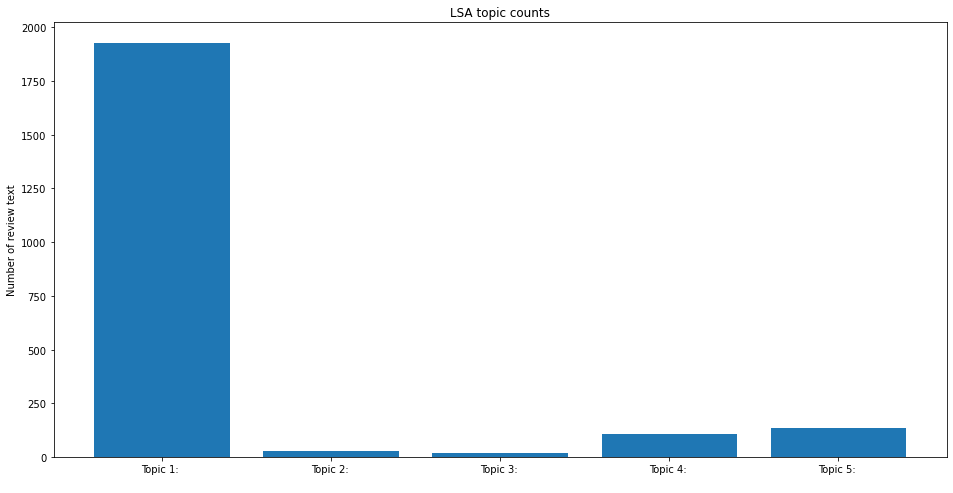

In [64]:
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i+1) for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of review text');
ax.set_title('LSA topic counts');
plt.show();

In [65]:

tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2222 samples in 0.014s...
[t-SNE] Computed neighbors for 2222 samples in 0.239s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2222
[t-SNE] Computed conditional probabilities for sample 2000 / 2222
[t-SNE] Computed conditional probabilities for sample 2222 / 2222
[t-SNE] Mean sigma: 0.030330
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.135796
[t-SNE] KL divergence after 2000 iterations: 0.894351


In [66]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        reviews_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                reviews_in_that_topic.append(two_dim_vectors[i])    
        
        reviews_in_that_topic = np.vstack(reviews_in_that_topic)
        mean_review_in_that_topic = np.mean(reviews_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_review_in_that_topic)
    return mean_topic_vectors

In [67]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]


In [68]:
top_3_words_lsa = get_top_n_words(4, lsa_keys, document_term_matrix, tfidf_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

GlyphRenderer(id='1041', ...)